In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
import matplotlib.pyplot as plt

In [3]:
breast = load_breast_cancer()

In [4]:
breast

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
breast_data = breast.data

In [6]:
breast_data.shape

(569, 30)

In [7]:
breast_labels = breast.target

In [8]:
breast_labels.shape

(569,)

In [9]:
import numpy as np

In [10]:
labels = np.reshape(breast_labels,(569,1))

- After reshaping the labels, you will concatenate the data and labels along the second axis, which means the final shape of the array will be 569 x 31.

In [11]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [12]:
final_breast_data.shape

(569, 31)

- Now you will import pandas to create the DataFrame of the final data to represent the data in a tabular fashion.

In [13]:
import pandas as pd

In [14]:
breast_dataset = pd.DataFrame(final_breast_data)

In [15]:
features = breast.feature_names

In [16]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

- If you note in the features array, the label field is missing. Hence, you will have to manually add it to the features array since you will be equating this array with the column names of your breast_dataset dataframe.

In [17]:
features_labels = np.append(features,'label')

In [18]:
breast_dataset.columns = features_labels

In [19]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


- Since the original labels are in 0,1 format, you will change the labels to benign and malignant using .replace function. You will use inplace=True which will modify the dataframe breast_dataset.

In [20]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [21]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


- You start by Standardizing the data since PCA's output is influenced based on the scale of the features of the data.

In [22]:
breast_dataset.loc[:, features]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
breast_dataset.loc[:, features].values

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [24]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [25]:
x.shape

(569, 30)

- Let's check whether the normalized data has a mean of zero and a standard deviation of on

In [26]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

- Let's convert the normalized features into a tabular format with the help of DataFrame.

In [27]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [28]:
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [29]:
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


- Now comes the critical part, the next few lines of code will be projecting the thirty-dimensional Breast Cancer data to two-dimensional principal components.

- You will use the sklearn library to import the PCA module, and in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data. Here, several components represent the lower dimension in which you will project your higher dimension data.

In [30]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

- Next, let's create a DataFrame that will have the principal component values for all 569 samples.

In [31]:
pca_breast.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [32]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [33]:
principal_breast_Df['target']=breast.target

- Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [34]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182]


- From the above output, you can observe that the principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

- Let's plot the visualization of the 569 samples along the principal component - 1 and principal component - 2 axis. It should give you good insight into how your samples are distributed among the two classes.

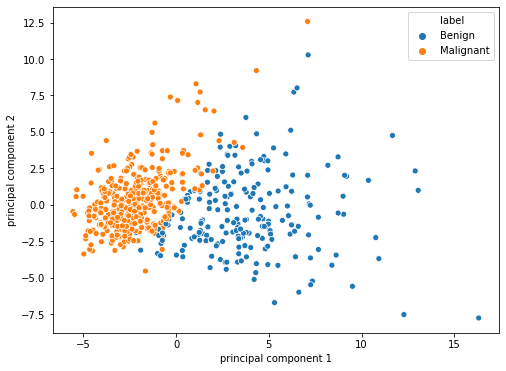

In [134]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='principal component 1',y='principal component 2',hue='label',data=principal_breast_Df)

Text(0, 0.5, 'Second Principal Component')

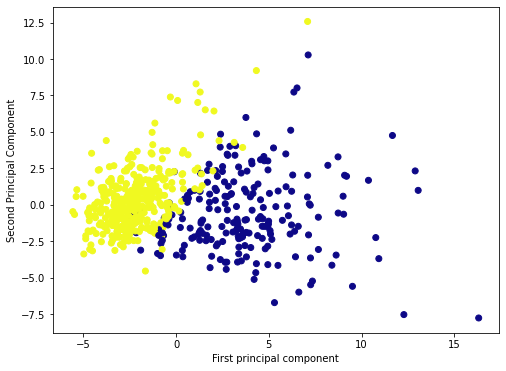

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(principalComponents_breast[:,0],principalComponents_breast[:,1],c=breast.target,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

<Figure size 432x288 with 0 Axes>

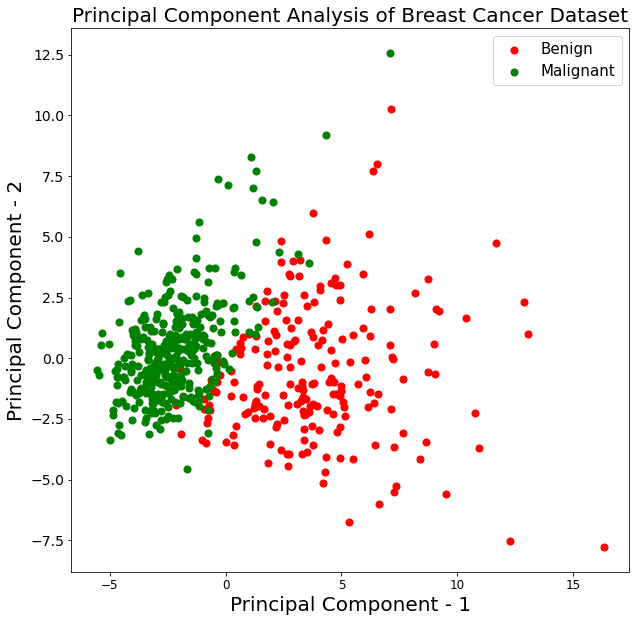

In [38]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### From the above graph, you can observe that the two classes benign and malignant, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.

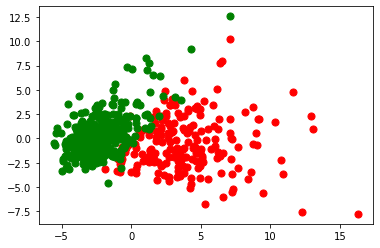

In [39]:
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

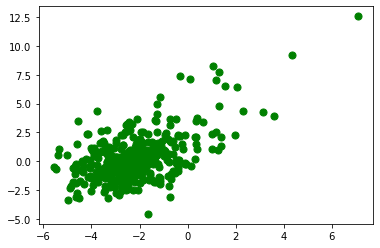

In [40]:
indicesToKeep = breast_dataset['label'] == target
plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

In [41]:
#### PCA Variance check

In [42]:
x.shape

(569, 30)

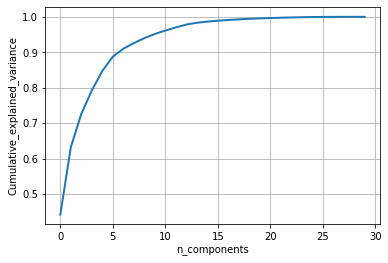

In [43]:

pca_breast.n_components = 30
pca_data = pca_breast.fit_transform(x)

percentage_var_explained = pca_breast.explained_variance_ / np.sum(pca_breast.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



#### How to Retain 90% of the variance

In [44]:
## PCA with 90% Variance retention

In [135]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
pcb=pca.fit_transform(x)

In [136]:
pca.n_components_

7

In [137]:
pca.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

In [138]:
feat_cols = ['principal_'+str(i) for i in range(1,pca.n_components_+1)]

In [139]:
feat_cols

['principal_1',
 'principal_2',
 'principal_3',
 'principal_4',
 'principal_5',
 'principal_6',
 'principal_7']

In [140]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))



Explained variation per principal component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]


In [141]:
pca_df = pd.DataFrame(data = pcb
             , columns =feat_cols)

In [142]:
pca_df

,principal_1,principal_2,principal_3,principal_4,principal_5,principal_6,principal_7
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082


In [143]:
pca_df['target']=breast.target

In [144]:
pca_df.corr()

,principal_1,principal_2,principal_3,principal_4,principal_5,principal_6,principal_7,target
principal_1,1.000000e+00,-7.513638e-17,4.949916e-17,-3.761649e-16,-7.497000e-17,-7.484212e-17,-1.105034e-16,-0.785491
principal_2,-7.513638e-17,1.000000e+00,-1.286256e-17,-1.378485e-16,4.840931e-17,-4.763787e-17,-3.583191e-18,0.188363
principal_3,4.949916e-17,-1.286256e-17,1.000000e+00,-1.902878e-16,-2.989506e-16,2.623405e-17,2.495211e-16,0.164782
principal_4,-3.761649e-16,-1.378485e-16,-1.902878e-16,1.000000e+00,2.266380e-16,-1.009409e-18,1.801954e-16,0.127566
principal_5,-7.497000e-17,4.840931e-17,-2.989506e-16,2.266380e-16,1.000000e+00,-3.111629e-18,-2.857123e-17,0.099288
principal_6,-7.484212e-17,-4.763787e-17,2.623405e-17,-1.009409e-18,-3.111629e-18,1.000000e+00,2.273386e-16,0.011425
principal_7,-1.105034e-16,-3.583191e-18,2.495211e-16,1.801954e-16,-2.857123e-17,2.273386e-16,1.000000e+00,0.078090
target,-7.854910e-01,1.883627e-01,1.647816e-01,1.275658e-01,9.928783e-02,1.142460e-02,7.808968e-02,1.000000


In [145]:
pca_df

,principal_1,principal_2,principal_3,principal_4,principal_5,principal_6,principal_7,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0
...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,0


In [146]:
X=pca_df.loc[:, pca_df.columns != 'target']
y=pca_df.target



In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [148]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from math import sqrt


scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=101)

In [158]:
#Random Forest

In [150]:
# rf classification
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100,
                                   bootstrap=True,
                                   max_features='sqrt',
                                   random_state=42
                                      )

rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', random_state=42)

In [153]:
# Actual class predictions
y_pred = rf_classifier.predict(X_test)
# Probabilities for each class
rf_probs = rf_classifier.predict_proba(X_test)[:] # 5 clusters from hdbscan
rf_probs

array([[0.16, 0.84],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.79, 0.21],
       [0.07, 0.93],
       [0.02, 0.98],
       [0.04, 0.96],
       [0.93, 0.07],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.93, 0.07],
       [0.05, 0.95],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.94, 0.06],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.96, 0.04],
       [0.22, 0.78],
       [0.17, 0.83],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.91, 0.09],
       [0.09, 0.91],
       [0.87, 0.13],
       [0.01, 0.99],
       [0.97, 0.03],
       [0.91, 0.09],
       [0.78, 0.22],
       [0.97, 0.03],
       [0.04, 0.96],
       [0.7 , 0.3 ],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.73, 0.27],
       [0.88, 0.12],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.88, 0.12],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.87, 0.13],
       [0.11,

In [154]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual Class'], colnames=['Predicted Class']))

Predicted Class   0    1
Actual Class            
0                61   10
1                 8  109


In [156]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 61,  10],
       [  8, 109]])

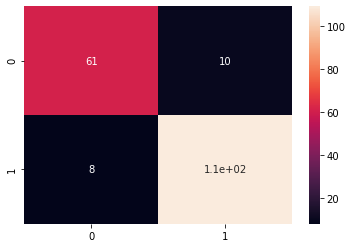

In [157]:
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)



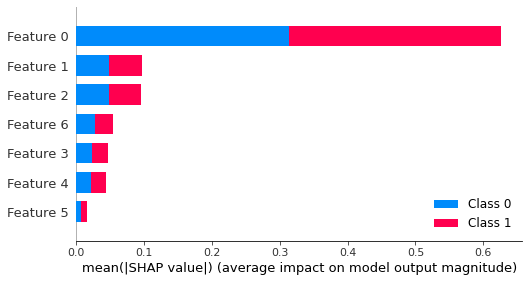

In [159]:
import shap
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

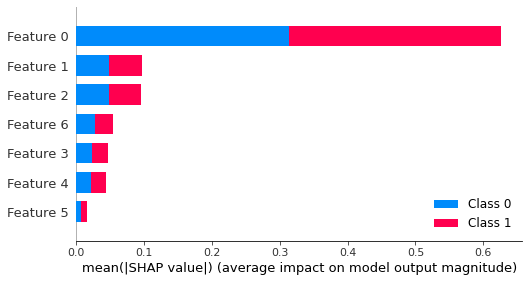

In [160]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

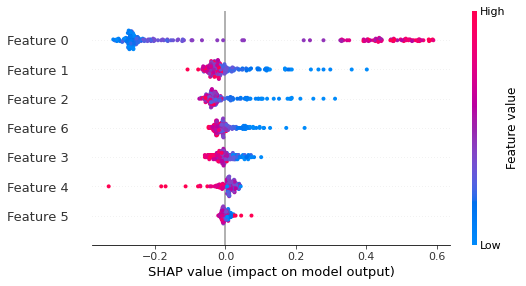

In [162]:
shap.summary_plot(shap_values[0], X_test)

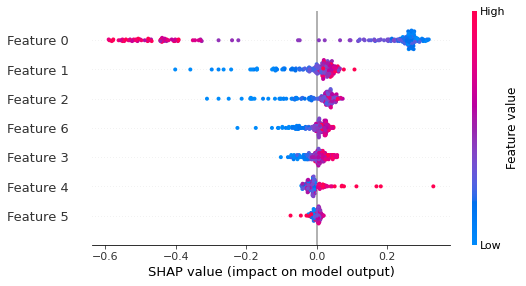

In [163]:
shap.summary_plot(shap_values[1], X_test)

In [165]:
###Logistic Regression

In [166]:
logistic_regression= LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)




In [167]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        63
           1       1.00      0.94      0.97       125

    accuracy                           0.96       188
   macro avg       0.94      0.97      0.95       188
weighted avg       0.96      0.96      0.96       188



In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        71
           1       0.94      1.00      0.97       117

    accuracy                           0.96       188
   macro avg       0.97      0.94      0.95       188
weighted avg       0.96      0.96      0.96       188



In [169]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 63,   8],
       [  0, 117]])

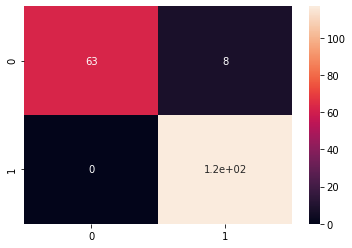

In [170]:

import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)




In [171]:
### PCA with 2components

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
principal_breast_Df

,principal component 1,principal component 2,target,label
0,9.192837,1.948583,0,Benign
1,2.387802,-3.768172,0,Benign
2,5.733896,-1.075174,0,Benign
3,7.122953,10.275589,0,Benign
4,3.935302,-1.948072,0,Benign
...,...,...,...,...
564,6.439315,-3.576817,0,Benign
565,3.793382,-3.584048,0,Benign
566,1.256179,-1.902297,0,Benign
567,10.374794,1.672010,0,Benign


In [174]:
principal_breast_Df['label']=breast_dataset['label']

In [175]:
principal_breast_Df

,principal component 1,principal component 2,target,label
0,9.192837,1.948583,0,Benign
1,2.387802,-3.768172,0,Benign
2,5.733896,-1.075174,0,Benign
3,7.122953,10.275589,0,Benign
4,3.935302,-1.948072,0,Benign
...,...,...,...,...
564,6.439315,-3.576817,0,Benign
565,3.793382,-3.584048,0,Benign
566,1.256179,-1.902297,0,Benign
567,10.374794,1.672010,0,Benign


In [176]:
principal_breast_Df.corr()

,principal component 1,principal component 2,target
principal component 1,1.000000e+00,-1.876165e-17,-0.785491
principal component 2,-1.876165e-17,1.000000e+00,0.188363
target,-7.854910e-01,1.883627e-01,1.000000


In [177]:
X=principal_breast_Df.loc[:, principal_breast_Df.columns != 'label']
y=principal_breast_Df.label



In [178]:
X

,principal component 1,principal component 2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [180]:
principal_breast_Df.isnull().sum()

principal component 1    0
principal component 2    0
target                   0
label                    0
dtype: int64

In [181]:
logistic_regression= LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)



In [182]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9946808510638298


In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99        71
   Malignant       0.99      1.00      1.00       117

    accuracy                           0.99       188
   macro avg       1.00      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



In [184]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 70,   1],
       [  0, 117]])

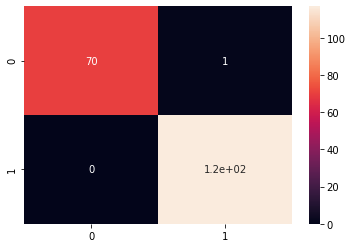

In [185]:

import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)



Text(0.5, 257.44, 'Predicted label')

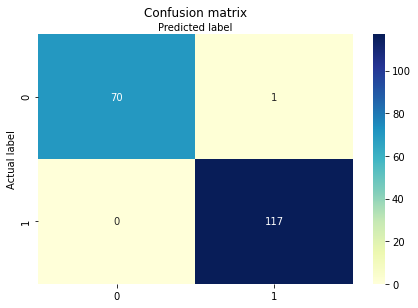

In [186]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [187]:
### Without PCA

In [188]:
breast_dataset.columns


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [202]:
X=breast_dataset.loc[:, breast_dataset.columns != 'label']
y=breast_dataset.label



In [203]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from math import sqrt


scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [212]:
scaled_X=pd.DataFrame(scaled_X,columns=X.columns)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.33, random_state = 101)

    




In [214]:

y

0         Benign
1         Benign
2         Benign
3         Benign
4         Benign
         ...    
564       Benign
565       Benign
566       Benign
567       Benign
568    Malignant
Name: label, Length: 569, dtype: object

In [215]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
43,-0.240643,0.230461,-0.191495,-0.311967,0.550801,0.744016,0.121415,0.326574,0.592845,0.711976,...,0.230029,0.378250,0.173913,0.046790,0.904396,0.751503,0.451982,0.526746,1.356095,1.039278
36,0.034851,0.565559,0.068416,-0.062255,0.133059,0.103456,0.541128,0.182128,0.267911,-0.219390,...,-0.078524,0.762561,0.266249,-0.142361,0.536175,1.078479,1.182165,0.458226,1.116664,0.967238
209,0.324545,-1.484587,0.255419,0.200825,-1.034766,-0.796739,-0.375134,-0.447504,-1.652485,-1.068535,...,0.230029,-1.588903,0.191785,0.091617,-0.445749,-0.226880,0.115196,-0.169110,-0.939535,-0.510148
330,0.540396,-0.879550,0.569700,0.393370,-0.103210,0.620832,0.396746,0.554335,-0.108136,-0.430613,...,0.515803,-0.602070,0.507515,0.332978,0.487955,1.231153,1.071822,1.271326,0.191293,0.404213
344,-0.686545,-0.893512,-0.697722,-0.667195,1.326504,-0.597559,-0.611921,-0.423515,0.720628,0.320717,...,-0.664567,-1.224133,-0.688089,-0.640202,0.597545,-0.908185,-0.784340,-0.547643,-0.219623,-0.326167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,-0.385490,2.359728,-0.437400,-0.418052,-0.967870,-1.175010,-0.864150,-0.875168,-0.995315,-0.911181,...,-0.496830,1.681000,-0.570733,-0.502558,-0.393146,-0.940628,-0.890701,-0.755639,-0.798788,-1.058764
393,2.125195,0.695875,2.159642,2.139081,1.447485,1.977758,2.413074,2.767200,1.279223,0.462478,...,2.062710,0.498754,1.928299,2.110228,0.781656,2.019330,2.077863,1.942819,1.500078,0.928447
75,0.551757,0.083856,0.499677,0.463051,-0.333074,-0.380943,0.111622,0.450385,-0.049721,-1.259911,...,0.724957,-0.181933,0.641551,0.601939,0.772888,-0.316575,0.051389,0.569380,-0.405668,-1.112518
337,1.318595,0.498074,1.274053,1.243188,-0.370080,0.679581,0.215954,0.309034,0.516175,-0.278929,...,1.712740,1.415565,1.603633,1.744582,0.764121,1.453165,0.917342,1.373344,1.259029,0.817615


In [216]:
# rf classification
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100,
                                   bootstrap=True,
                                   max_features='sqrt',
                                   random_state=42
                                      )


In [217]:

rf_classifier.fit(X_train,y_train)

# Actual class predictions
y_pred = rf_classifier.predict(X_test)
# Probabilities for each class
rf_probs = rf_classifier.predict_proba(X_test)[:] # 5 clusters from hdbscan
rf_probs


array([[0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.96, 0.04],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.42, 0.58],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.02, 0.98],
       [0.95, 0.05],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.61, 0.39],
       [0.66, 0.34],
       [0.99, 0.01],
       [0.11, 0.89],
       [0.72, 0.28],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.85, 0.15],
       [0.72, 0.28],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.1 , 0.9 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.26,

In [218]:

print(pd.crosstab(y_test, y_pred, rownames=['Actual Class'], colnames=['Predicted Class']))

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



Predicted Class  Benign  Malignant
Actual Class                      
Benign               66          5
Malignant             6        111


array([[ 66,   5],
       [  6, 111]])

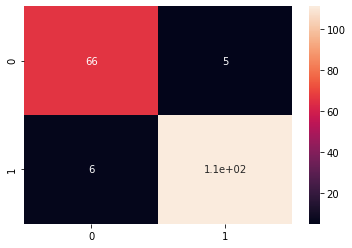

In [219]:
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)




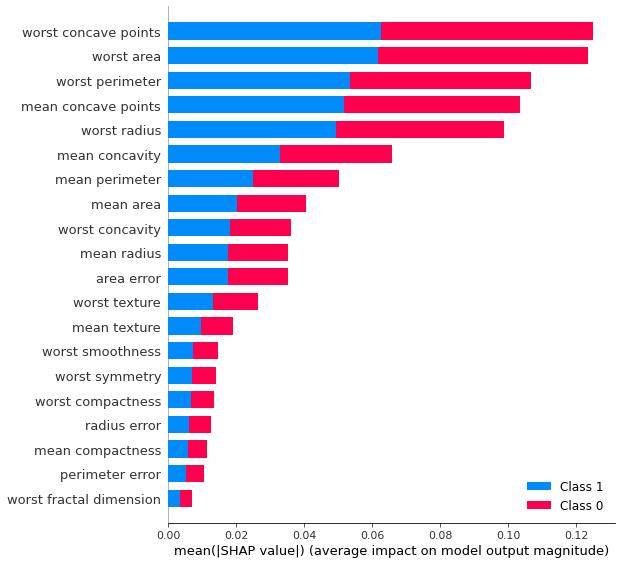

In [220]:

import shap
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")



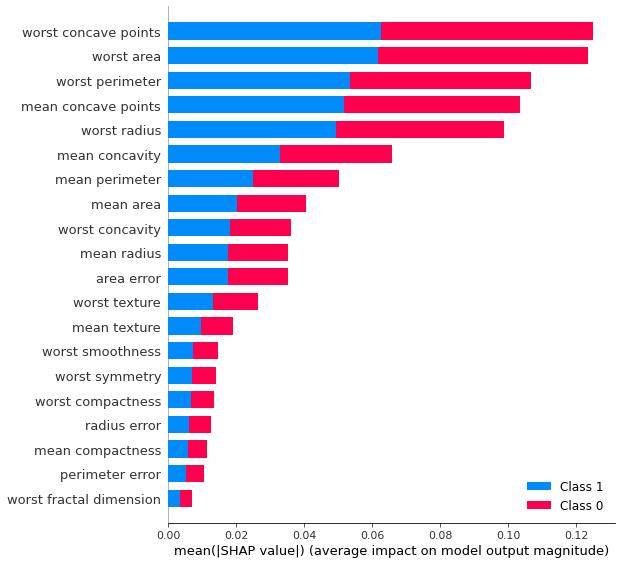

In [221]:
shap.summary_plot(shap_values, X_train, plot_type="bar")



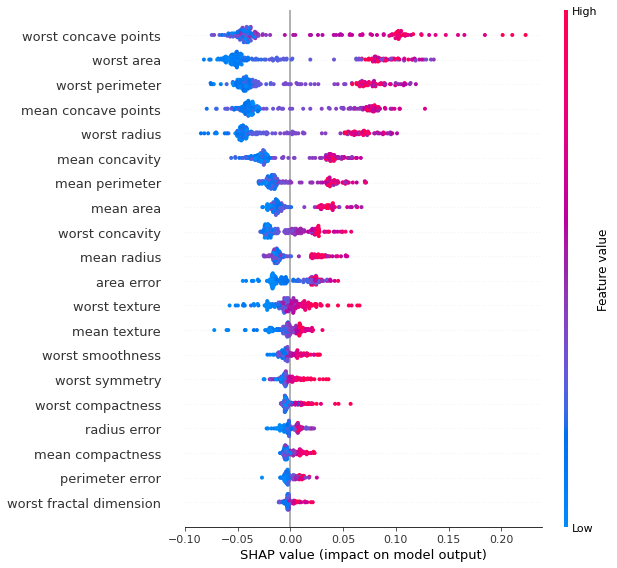

In [222]:
shap.summary_plot(shap_values[0], X_test)



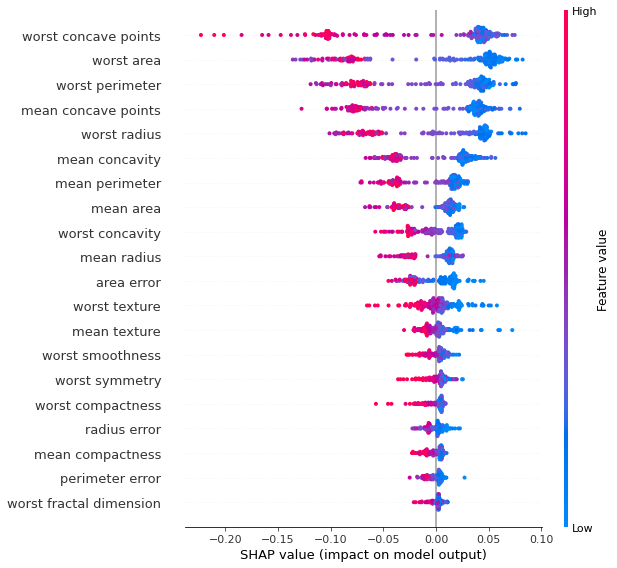

In [223]:
shap.summary_plot(shap_values[1], X_test)

In [224]:
###Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression

logistic_regression= LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train,y_train)



LogisticRegression()

In [226]:

y_pred=logistic_regression.predict(X_test)

In [227]:

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))



0.9787234042553191


In [228]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))





              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97        71
   Malignant       0.97      0.99      0.98       117

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [229]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 68,   3],
       [  1, 116]])

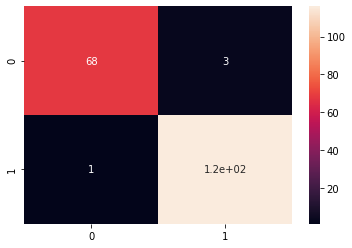

In [230]:


import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)






Text(0.5, 257.44, 'Predicted label')

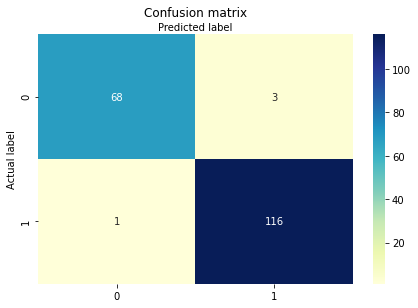

In [231]:


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


- here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 66 and 111 are actual predictions, and 5 and 6 are incorrect predictions.

In [98]:

from sklearn import tree
classifier=tree.DecisionTreeClassifier()

classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
print(cnf_matrix)

0.9202127659574468
[[ 63   8]
 [  7 110]]


In [99]:

from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier()

classifier.fit(X_train,y_train)



KNeighborsClassifier()

In [100]:
prediction1=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction1))




0.9308510638297872


- Model Evaluation using Confusion Matrix
- A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

## TSNE

In [101]:

from sklearn.manifold import TSNE

In [102]:
X=breast_dataset.loc[:, breast_dataset.columns != 'label']
y=breast_dataset.label



from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from math import sqrt


scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [103]:
model = TSNE(n_components=2, random_state=0)

In [104]:
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(scaled_X)




In [105]:
tsne_data = np.vstack((tsne_data.T, y)).T



In [106]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))



/Users/amimalli/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


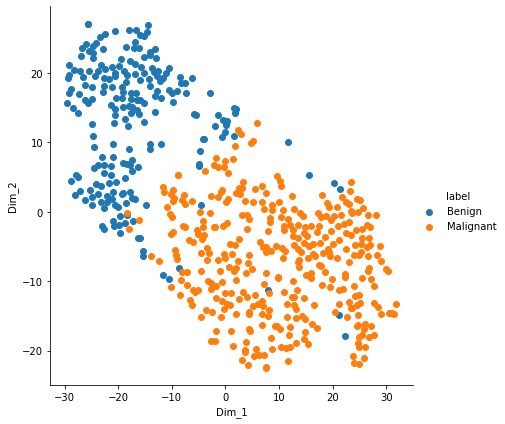

In [107]:

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/Users/amimalli/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


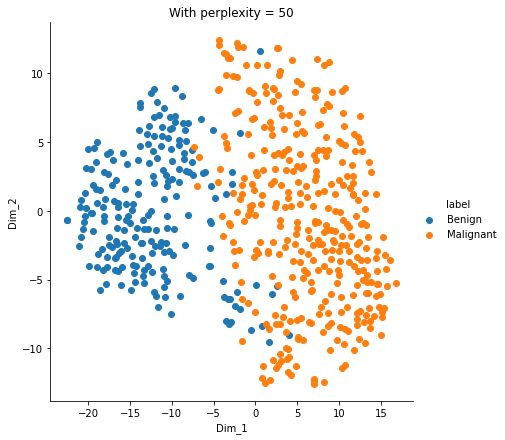

In [108]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(scaled_X) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

/Users/amimalli/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


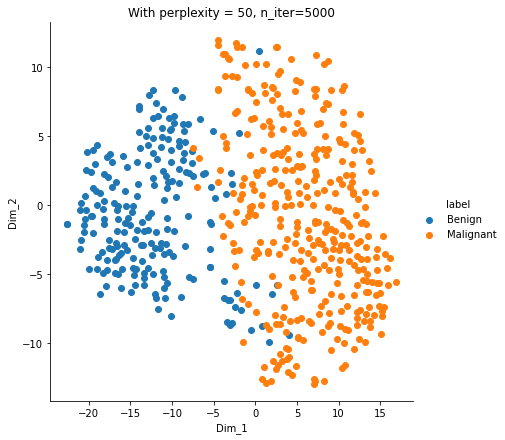

In [109]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(scaled_X) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

In [110]:
def tsne(df, n_iter):
    perp = math.ceil((df.shape[0] ** (1/2))*2)
    tsne = TSNE(random_state=42, perplexity=perp, n_iter=iterations)
    ind = df.index
    df = tsne.fit_transform(df)
    df = pd.DataFrame({'x':df[:,0],
                       'y':df[:,1],
                       'time':ind
                      })
    fig = px.scatter(df, x='x',y='y',hover_data=df)
    fig.show()
    return df

/Users/amimalli/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


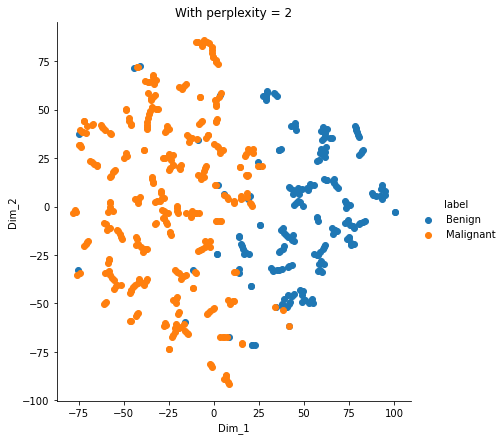

In [111]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(scaled_X) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

In [112]:
breast_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign


In [113]:
tsne_df

,Dim_1,Dim_2,label
0,77.4923,-19.3229,Benign
1,42.8473,41.4422,Benign
2,74.7569,-16.3967,Benign
3,44.6584,-17.7977,Benign
4,60.1016,34.4613,Benign
...,...,...,...
564,93.4296,10.8533,Benign
565,65.6125,35.3784,Benign
566,25.4776,-9.47024,Benign
567,81.1285,-8.52757,Benign


In [114]:
X=tsne_df.loc[:, tsne_df.columns != 'label']
y=tsne_df.label




In [115]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from math import sqrt


scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [116]:

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=101)



In [117]:

from sklearn.linear_model import LogisticRegression

logistic_regression= LogisticRegression(solver='lbfgs')
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)




In [118]:

    
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))








              precision    recall  f1-score   support

      Benign       0.89      0.82      0.85        71
   Malignant       0.89      0.94      0.92       117

    accuracy                           0.89       188
   macro avg       0.89      0.88      0.88       188
weighted avg       0.89      0.89      0.89       188



In [119]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 58,  13],
       [  7, 110]])

Text(0.5, 257.44, 'Predicted label')

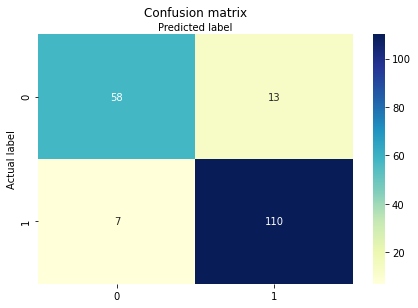

In [120]:


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



DBSCAN

In [121]:
X=breast_dataset.loc[:, breast_dataset.columns != 'label']
y=breast_dataset.label



from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from math import sqrt


scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [122]:
from sklearn.cluster import DBSCAN

In [123]:
db = DBSCAN(eps=0.2, min_samples=60).fit(scaled_X) 

In [124]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True


In [125]:
labels = db.labels_

In [126]:
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

['y', 'b', 'g', 'r']


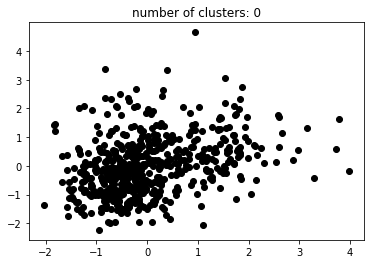

In [127]:
import matplotlib.pyplot as plt 
  
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = scaled_X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = scaled_X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

Text(0.5, 1.0, 'DBSCAN clustering plot')

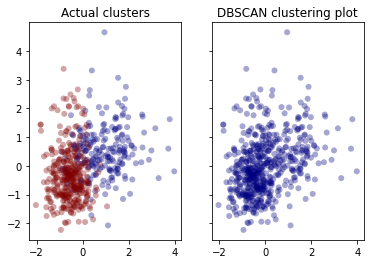

In [128]:

from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2, min_samples=6)
dbs_pred = dbs.fit_predict(scaled_X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(scaled_X[:,0], scaled_X[:,1], c=breast.target, cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(scaled_X[:,0], scaled_X[:,1], c=dbs_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("DBSCAN clustering plot")

# KMeans Clustering >> k=2 i.e. either Malignant or Benign

In [129]:


from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(scaled_X)


In [130]:
len(km.labels_)

569

Text(0.5, 1.0, 'KMeans clustering plot')

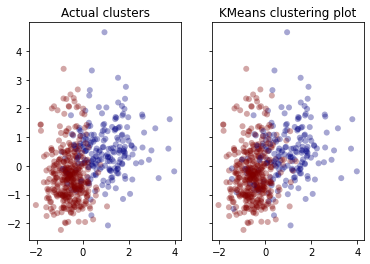

In [131]:
#labels = km.labels_

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(scaled_X[:,0], scaled_X[:,1], c=breast.target, cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(scaled_X[:,0], scaled_X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering plot")

## Gaussian Mixture with Variation Inference (VI) Clustering >> Dirichlet process.
## Uses only as much as needed components for a good fit.

Text(0.5, 1.0, 'Gaussian Mix-VI clustering plot')

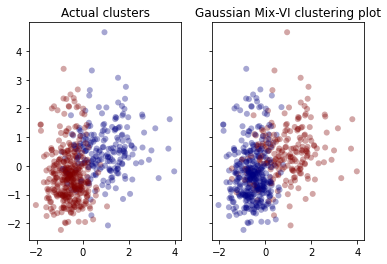

In [132]:


from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=2, covariance_type="full")
bgm_pred = bgm.fit_predict(scaled_X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(scaled_X[:,0], scaled_X[:,1], c=breast.target, cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(scaled_X[:,0], scaled_X[:,1], c=bgm_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Gaussian Mix-VI clustering plot")

# Hierarchical Agglomerative Clustering 

Text(0.5, 1.0, 'Agglomeratve clustering plot')

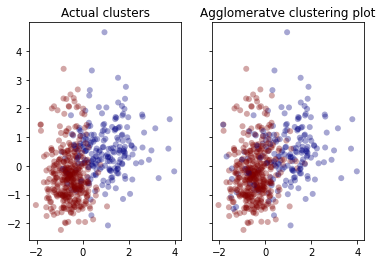

In [133]:
#2 Hierarchical Agglomerative Clustering 

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_pred = ac.fit_predict(scaled_X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(scaled_X[:,0], scaled_X[:,1], c=breast.target, cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(scaled_X[:,0], scaled_X[:,1], c=ac_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Agglomeratve clustering plot")